In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import  seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
bike = pd.read_csv('Bike.csv')

In [3]:
bike

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [4]:
bike.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [5]:
bike.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [6]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [7]:
# Modifying the datetime column to bring out columns 'time' and 'month'
time = []
month = []
for i in bike['datetime']:
    datetm = datetime.strptime(i, "%Y-%m-%d %H:%M:%S")
    time.append(datetm.hour)
    month.append(datetm.month)
bike['time'] = pd.DataFrame(time)
bike['time'] = bike['time'].astype(float)
bike['month'] = pd.DataFrame(month)
bike['month'] = bike['month'].astype(float)

In [8]:
bike.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,time,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0.0,1.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1.0,1.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2.0,1.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3.0,1.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4.0,1.0


In [9]:
bike.drop('datetime', axis = 1, inplace = True)

## TO DEFINE THE COLUMNS

1. datetime: hourly date + timestamp
2. season: 1 = spring, 2 = summer, 3 = fall, 4 = winter
3. holiday: whether the day is considered a holiday
4. workingday: whether the day is neither a weekend nor holiday
5. weather: 1- Clear, Few clouds, Partly cloudy, Partly cloudy
         2- Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
         3- Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light     Rain + Scattered clouds
         4- Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
6. temp temperature: in Celsius
7. atemp: "feels like" temperature in Celsius
8. humidity: relative humidity
9. windspeed: wind speed
10. casual: number of non-registered user rentals initiated
11. registered: number of registered user rentals initiated
12. count: number of total rentals


In [12]:
# To check the correlation of the dataset
bike.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,time,month
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439,-0.006546,0.971524
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,-0.000354,0.001731
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,0.002780,-0.003394
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655,-0.022740,0.012144
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.145430,0.257589
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.140343,0.264173
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,-0.278011,0.204537
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,0.146631,-0.150192
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.302045,0.092722
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.380540,0.169451


From the correlation analysis, columns 'temp' and 'atemp' are highly correlated, same as 'season' and 'month', so also 'count' and 'registered'. So the columns 'atemp' and 'registered' would be dropped.

In [14]:
bike.drop(['atemp', 'registered'], axis = 1, inplace = True)

In [15]:
bike.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,casual,count,time,month
0,1,0,0,1,9.84,81,0.0,3,16,0.0,1.0
1,1,0,0,1,9.02,80,0.0,8,40,1.0,1.0
2,1,0,0,1,9.02,80,0.0,5,32,2.0,1.0
3,1,0,0,1,9.84,75,0.0,3,13,3.0,1.0
4,1,0,0,1,9.84,75,0.0,0,1,4.0,1.0


In [16]:
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

Text(0.5, 1.0, 'Measurment of Total Rentals on either Working days or Holidays')

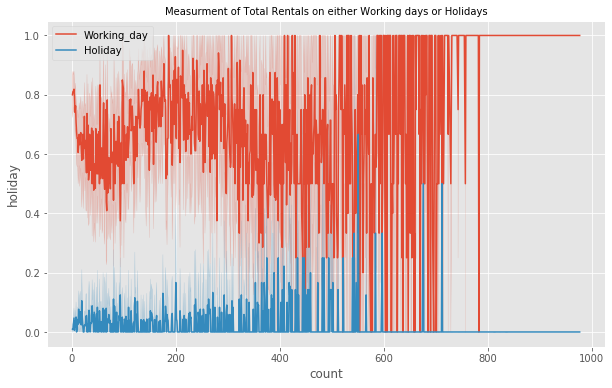

In [17]:
sns.lineplot(data=bike, x='count', y='workingday')
sns.lineplot(data=bike, x='count', y='holiday')
plt.legend(["Working_day", "Holiday"], prop={'size': 10})
plt.title("Measurment of Total Rentals on either Working days or Holidays", fontsize=10)

From the graph above, we understand that the total number of rentals on Working days are more than on Holidays.

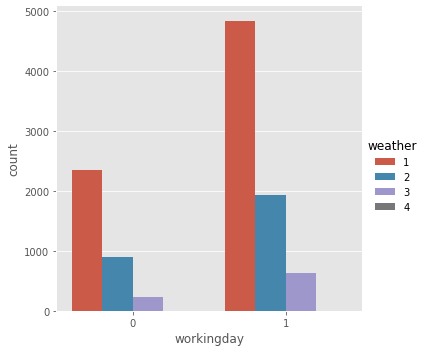

In [18]:
sns.catplot('workingday', hue='weather', data = bike, kind='count')

The analysis above shows that there is a greater number of bike rentals on working days when the weather was 1- Clear with Few clouds and Partly cloudy.

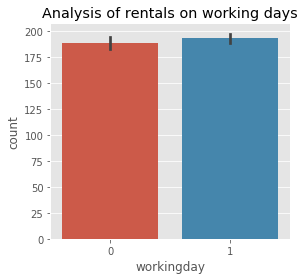

In [19]:
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
sns.barplot(x = "workingday" , y = bike["count"] , data = bike)
plt.title("Analysis of rentals on working days")

plt.tight_layout()
plt.show()

The Analysis shows that the number of rentals are more on weekdays (1) than weekends or holidays (0).

## Building the Linear Regression Model 

In [20]:
y = bike["count"]

In [21]:
x = bike.drop("count", axis = 1)

In [22]:
y.head()

0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

In [23]:
x.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,casual,time,month
0,1,0,0,1,9.84,81,0.0,3,0.0,1.0
1,1,0,0,1,9.02,80,0.0,8,1.0,1.0
2,1,0,0,1,9.02,80,0.0,5,2.0,1.0
3,1,0,0,1,9.84,75,0.0,3,3.0,1.0
4,1,0,0,1,9.84,75,0.0,0,4.0,1.0


In [24]:
x = x.to_numpy()

In [25]:
y = y.to_numpy()

In [26]:
reg = LinearRegression()

In [27]:
reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
w = reg.coef_

In [29]:
w

array([-9.3005344 , 26.62655475, 90.28204199, -7.58412031,  0.32464201,
       -0.34518819,  0.32777544,  2.44424742,  4.77026581,  8.85977061])

In [30]:
b = reg.intercept_

In [31]:
y_ = reg.predict(x)

In [32]:
#To print out our prediction in order to view it.

y_

array([-52.32755935, -35.25707468, -37.81955115, ..., 223.28203925,
       244.6569283 , 228.86272194])

In [34]:
#We can observe that the prediction y_ above is good it is very similar to the original output y below

y

array([ 16,  40,  32, ..., 168, 129,  88], dtype=int64)

In [35]:
reg.score(x,y)

0.5817544729609772

In [36]:
x

array([[ 1.,  0.,  0., ...,  3.,  0.,  1.],
       [ 1.,  0.,  0., ...,  8.,  1.,  1.],
       [ 1.,  0.,  0., ...,  5.,  2.,  1.],
       ...,
       [ 4.,  0.,  1., ...,  4., 21., 12.],
       [ 4.,  0.,  1., ..., 12., 22., 12.],
       [ 4.,  0.,  1., ...,  4., 23., 12.]])

In [37]:
x[0]

array([ 1.  ,  0.  ,  0.  ,  1.  ,  9.84, 81.  ,  0.  ,  3.  ,  0.  ,
        1.  ])

In [38]:
x.shape

(10886, 10)

In [39]:
x[0].reshape(1,-1).shape

(1, 10)

In [40]:
reg.predict(x[0].reshape(1,-1))

array([-52.32755935])

In [41]:
y[0]

16

## Conclusion

We understood that bike rental demands are more on weekdays when the weather is clear, few clouds or partly cloudy as against weekends or holidays.